In [5]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram


In [25]:
provider = IBMQ.get_provider(hub='ibm-q')

In [17]:
q = QuantumRegister(9)
c = ClassicalRegister(5)
qc = QuantumCircuit(q, c)

In [18]:
qc.x(q[5])
qc.h(q[0:6])
qc.barrier(q)

In [19]:
qc.barrier(q)

# build oracle. ex: to find 10101 state
qc.x(q[1])
qc.x(q[3])
qc.barrier(q)
qc.mct([q[0], q[1], q[2], q[3], q[4]], q[5], q[6:9])    # control qubits, target qubit, ancilla qubits = number of control qubits - 2
qc.barrier(q)
qc.x(q[1])
qc.x(q[3])

qc.barrier(q)

In [20]:
qc.barrier(q)
qc.h(q[0:5])
qc.barrier(q)
qc.x(q[0:5])
qc.barrier(q)
qc.h(q[4])
qc.barrier(q)
qc.mct([q[0], q[1], q[2], q[3], q[4]], q[5], q[6:9])
qc.barrier(q)
qc.h(q[4])
qc.barrier(q)
qc.x(q[0:5])
qc.barrier(q)
qc.h(q[0:5])
qc.barrier(q)

In [21]:
qc.measure(q[0:5], c[0:5])

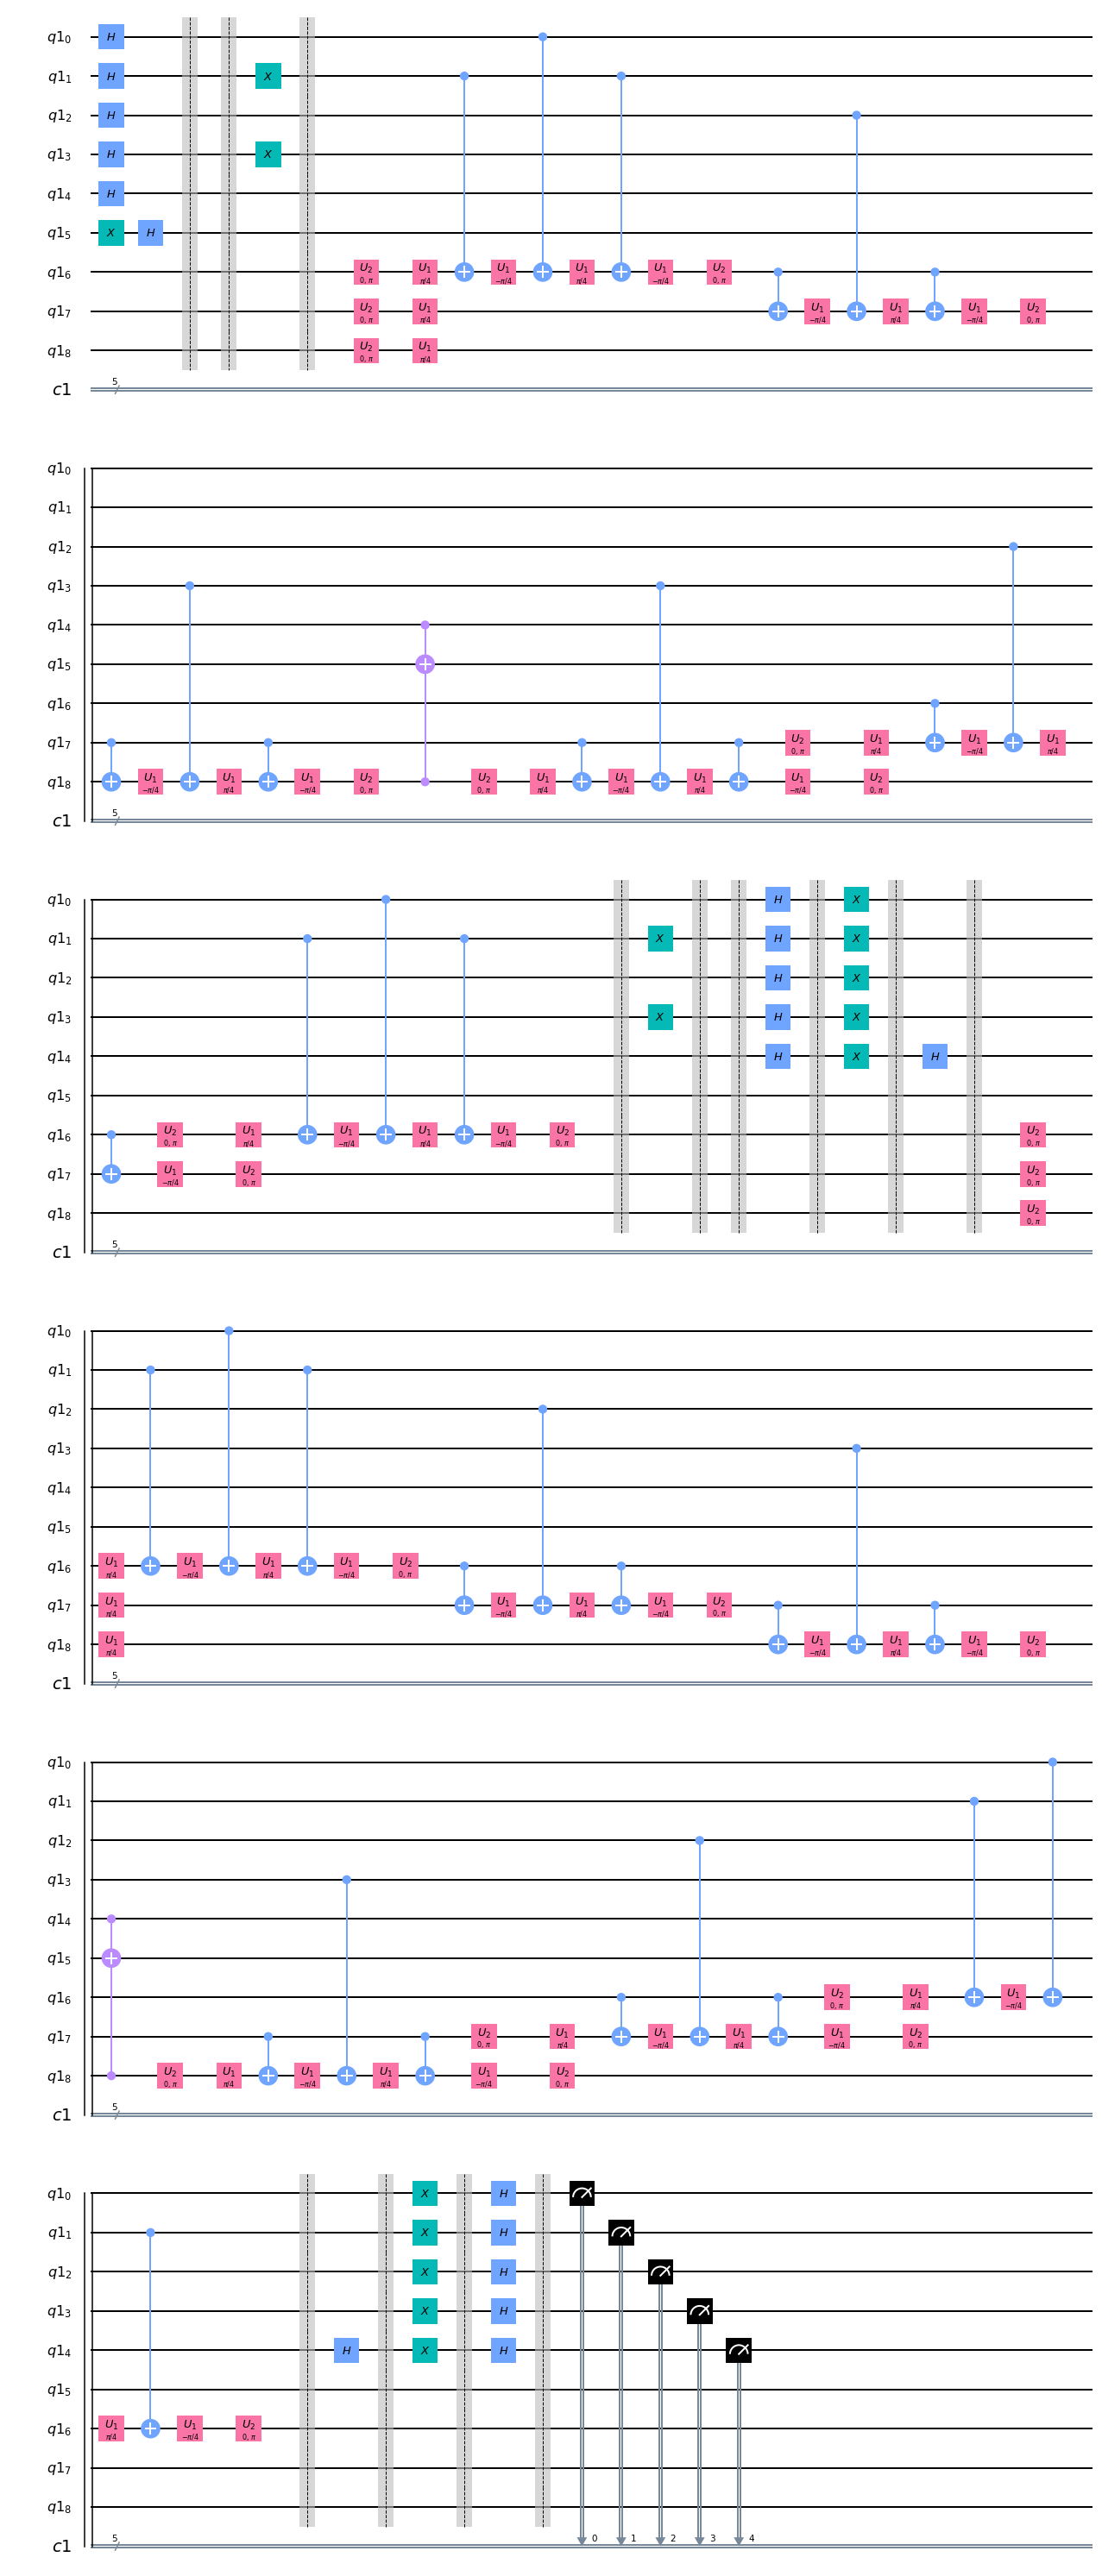

In [22]:
qc.draw(output='mpl')

In [23]:

# running and getting results 

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
# backend = provider.get_backend('ibmq_qasm_simulator')
# job = execute(qc, backend=backend, shots=8000, seed_simulator=12345, backend_options={"fusion_enable":True})
result = job.result()
count = result.get_counts()
print(count)

{'11101': 23, '01101': 28, '01110': 29, '10101': 228, '01011': 28, '10110': 23, '00101': 28, '10010': 18, '01100': 32, '10111': 19, '01111': 32, '00000': 38, '01001': 28, '11000': 20, '11001': 26, '11110': 16, '10100': 15, '11111': 12, '01000': 22, '01010': 37, '00010': 30, '10000': 20, '11011': 20, '00111': 31, '11100': 20, '00011': 19, '00001': 32, '10011': 17, '00100': 33, '10001': 18, '00110': 39, '11010': 19}


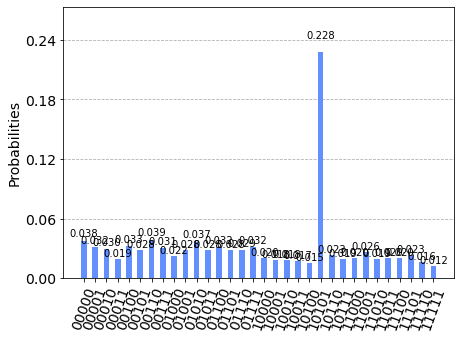

In [24]:
plot_histogram(count)